In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [52]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_high',
            'temperature_reference_high', 
            'pressure_reference_low', 
            'temperature_reference_low',
            'ighigh', 
            'ng', 
            'absth',
            'wgt']


def pattern_assign(name):
    return ''' 
    parameter .* :: .* ({} .* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/]+ {}[^,] [^/]+ / [^/]+ /)
    '''.format(name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples',
                          'separate_g_groups/study__lblnew_g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_500_T_250_ng_15_dlogN_uniform__P_1_T_250_ng_15_dlogN_uniform',
                          'wgt_15x1_15x.7',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples',
                          'separate_g_groups/study__lblnew_g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_500_T_250_ng_15_dlogN_uniform__P_1_T_250_ng_15_dlogN_uniform',
                          'wgt_15x1_15x.7',
                          'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [55]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 30 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [20]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [21]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [22]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [53]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 1215

nband = 165

nv = 200

dv = 0.005

tsfc = 294.0

pressure_reference_high = 1.

temperature_reference_high = 250.

pressure_reference_low = 500.

temperature_reference_low = 250.

ighigh = 15

ngas = 6      

ng = 30

data absth(:, 1) /

!     thresholds for reference (P, T) low
!     data absth(:, 2) /

data wgt
     &     /15 * 1.0, 15 * 0.7/

include 'mls75.pro'


In [56]:
fig.display_hrefanchor()

In [25]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [26]:
table_dgdgs.display_hrefanchor()

In [39]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [27]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

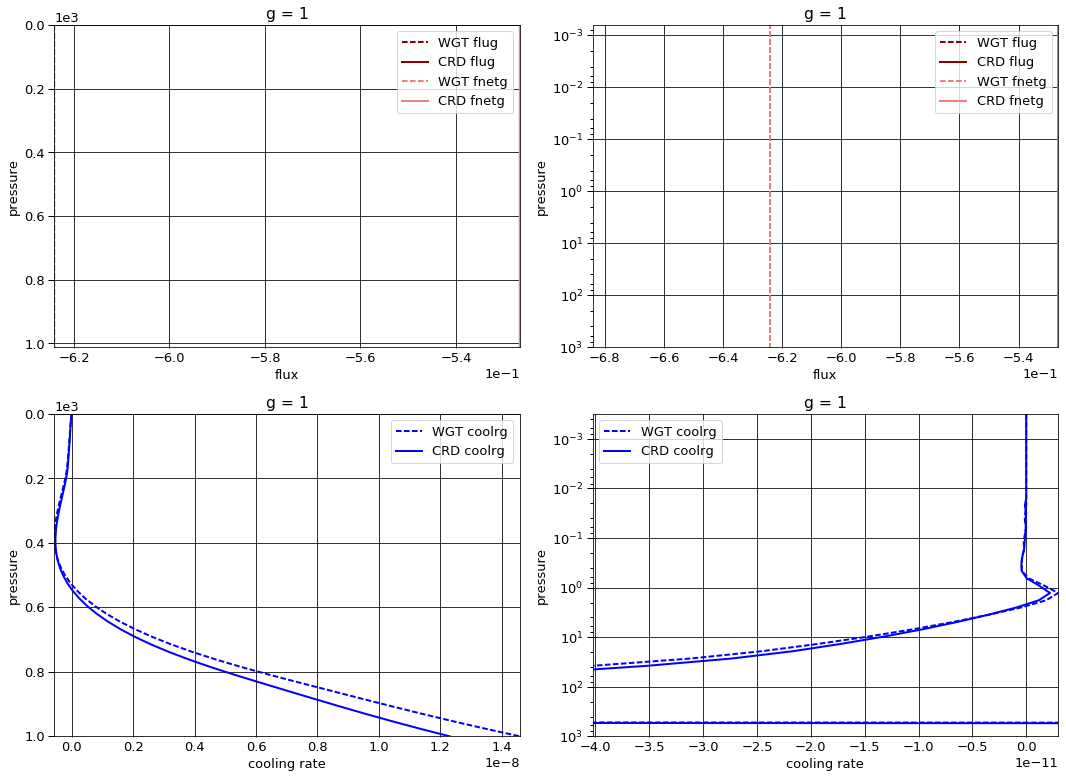

# Figure: flux, cooling rate. g-group 2

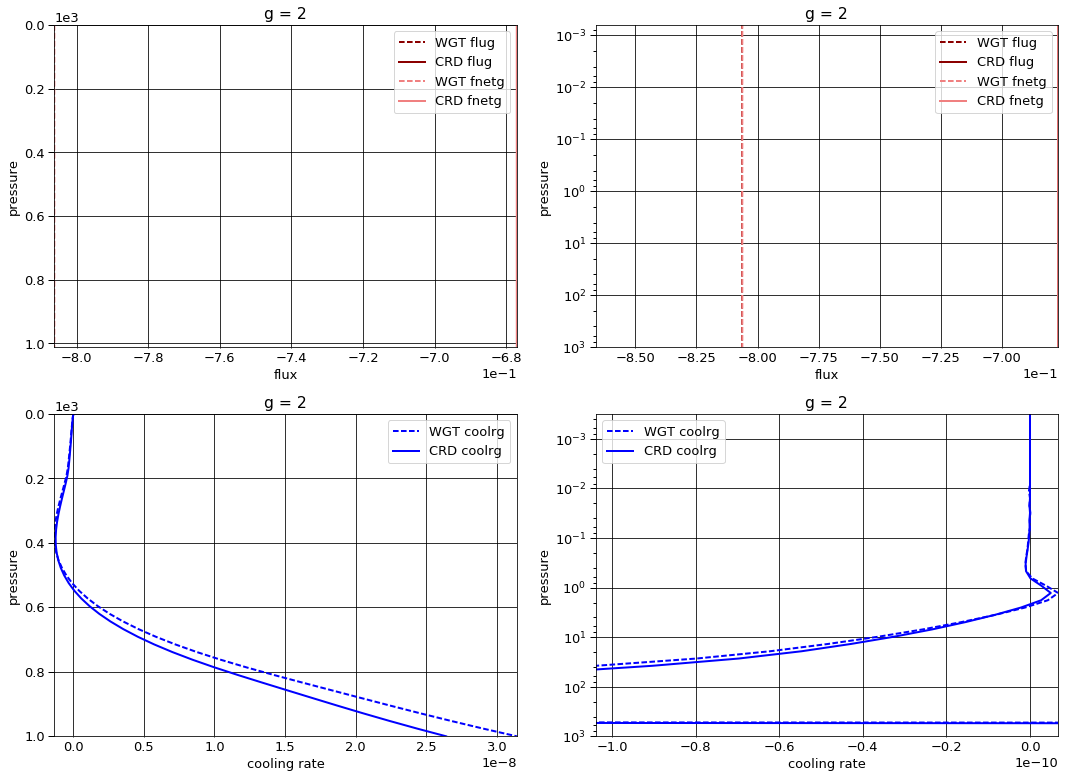

# Figure: flux, cooling rate. g-group 3

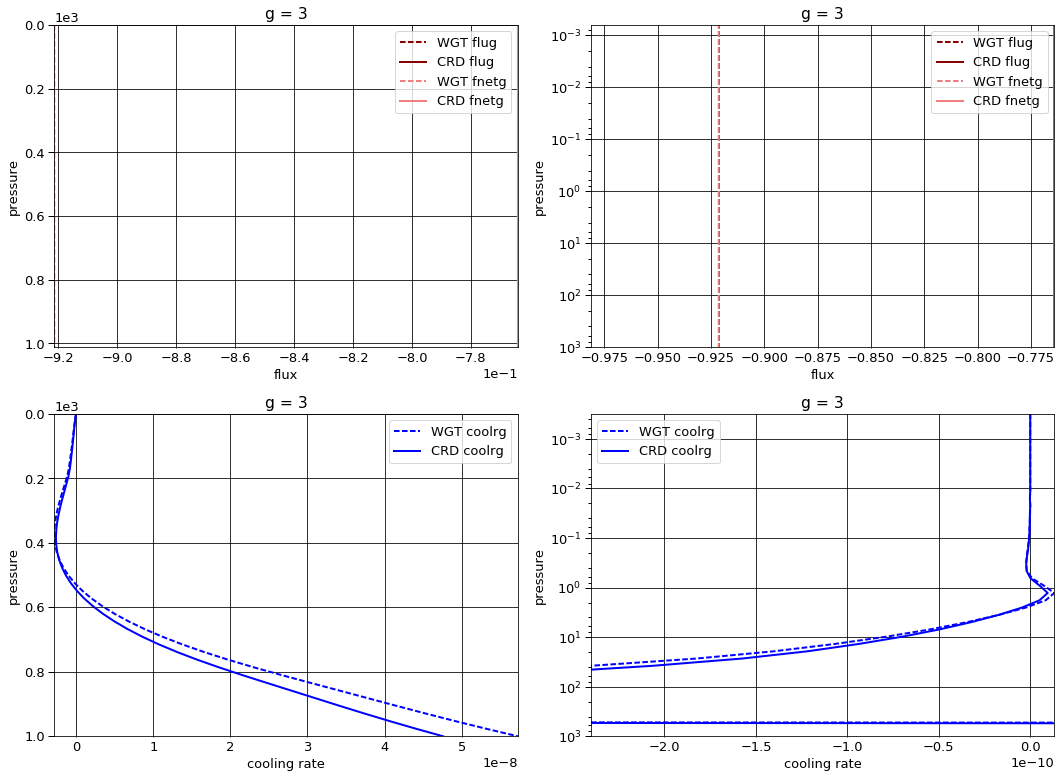

# Figure: flux, cooling rate. g-group 4

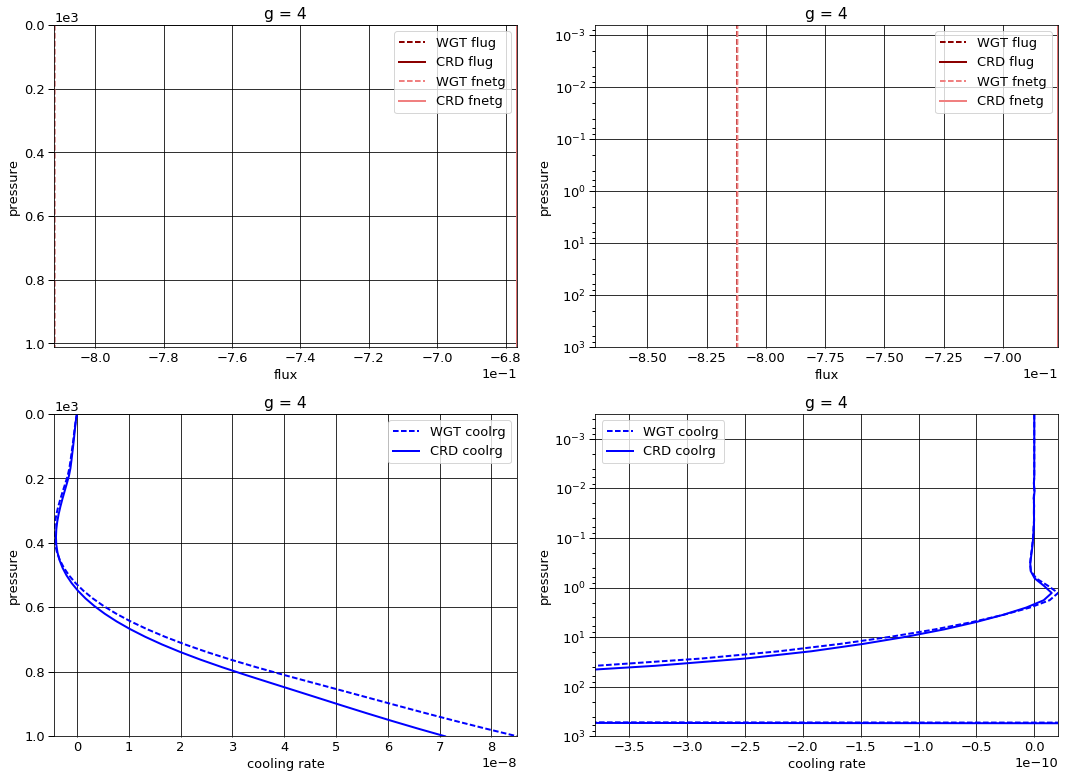

# Figure: flux, cooling rate. g-group 5

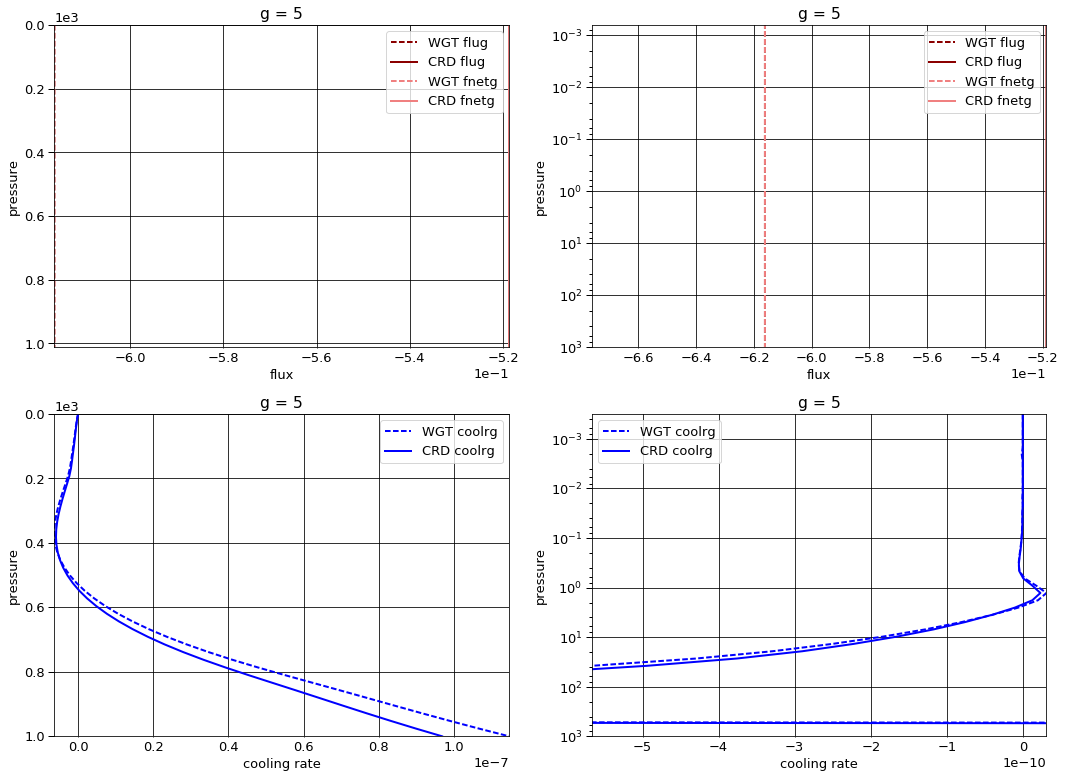

# Figure: flux, cooling rate. g-group 6

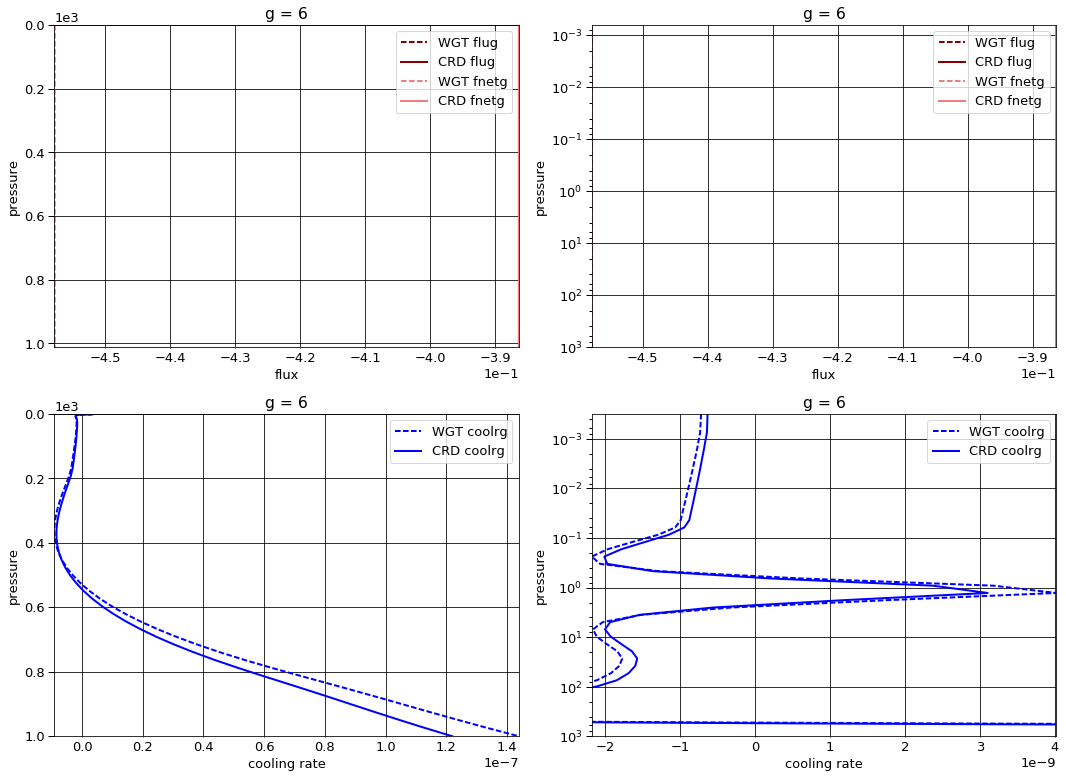

# Figure: flux, cooling rate. g-group 7

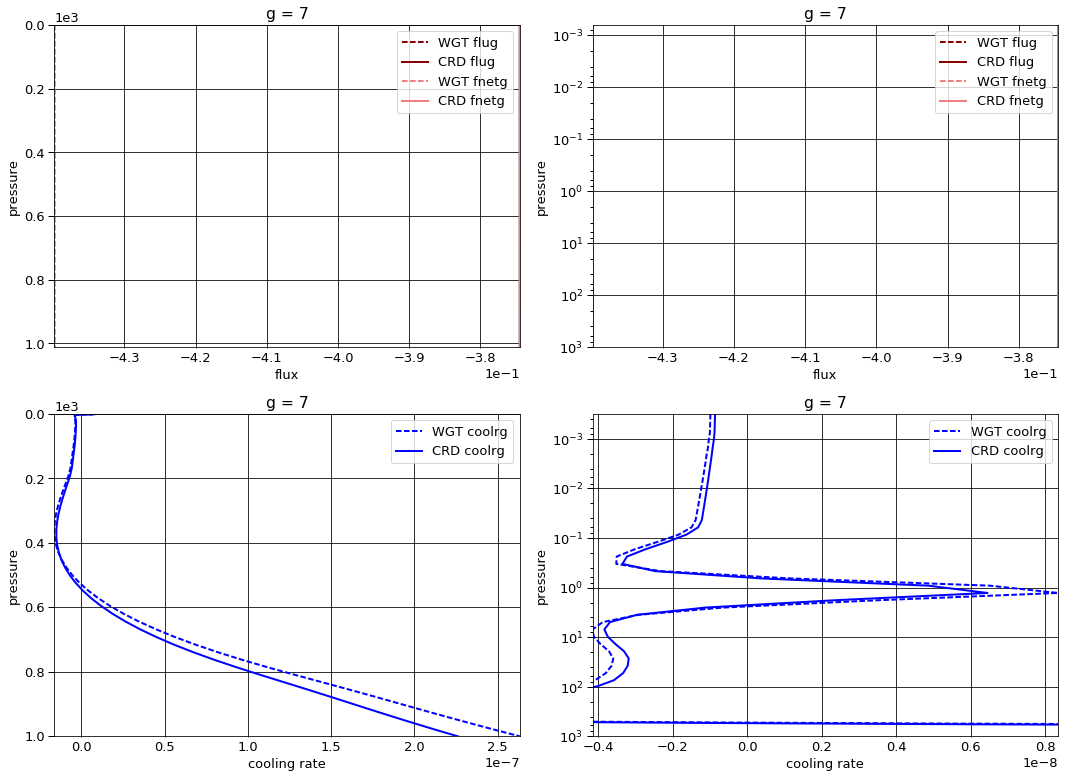

# Figure: flux, cooling rate. g-group 8

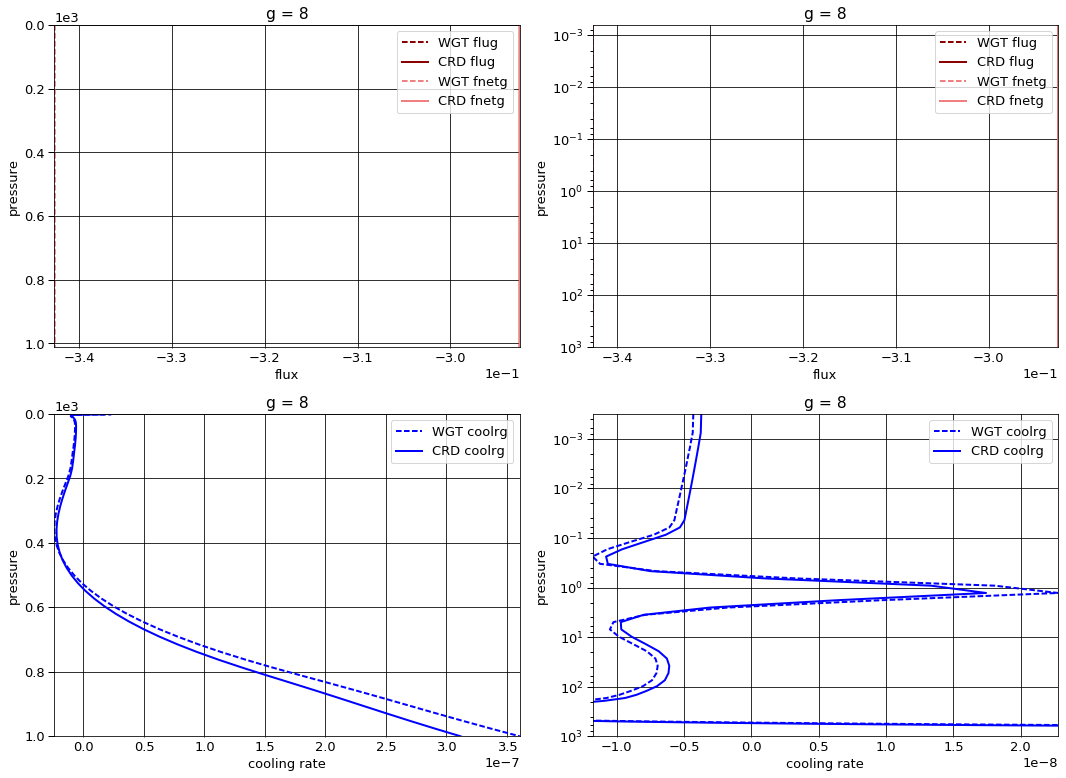

# Figure: flux, cooling rate. g-group 9

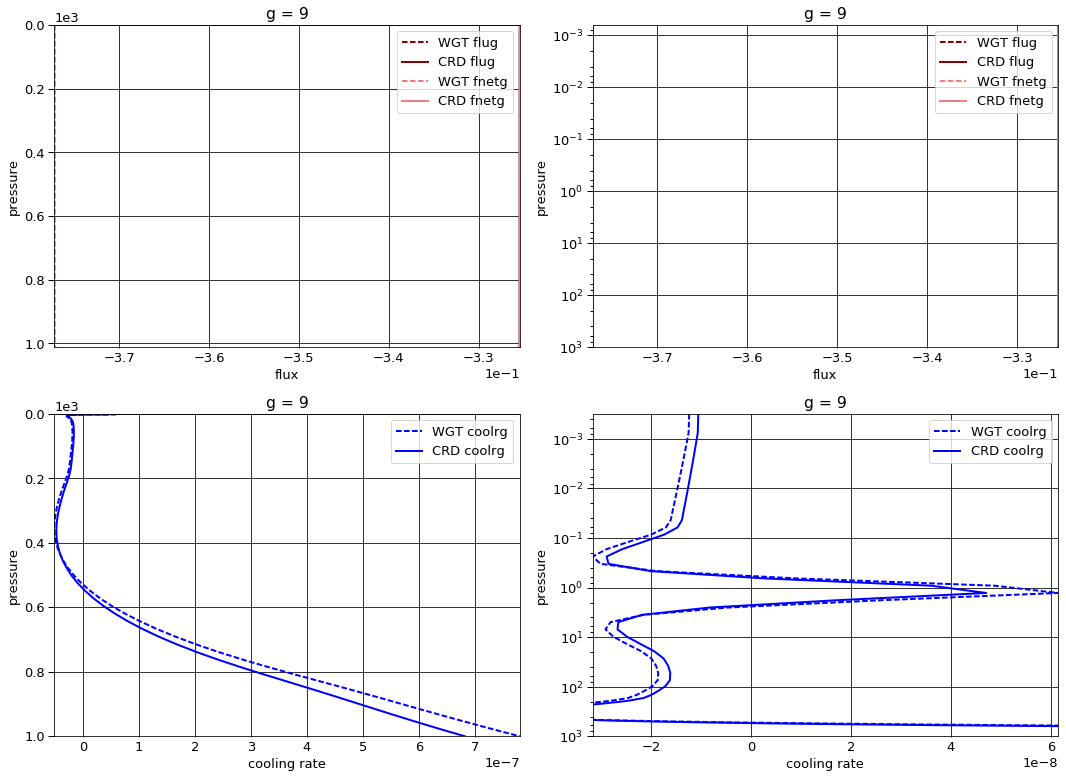

# Figure: flux, cooling rate. g-group 10

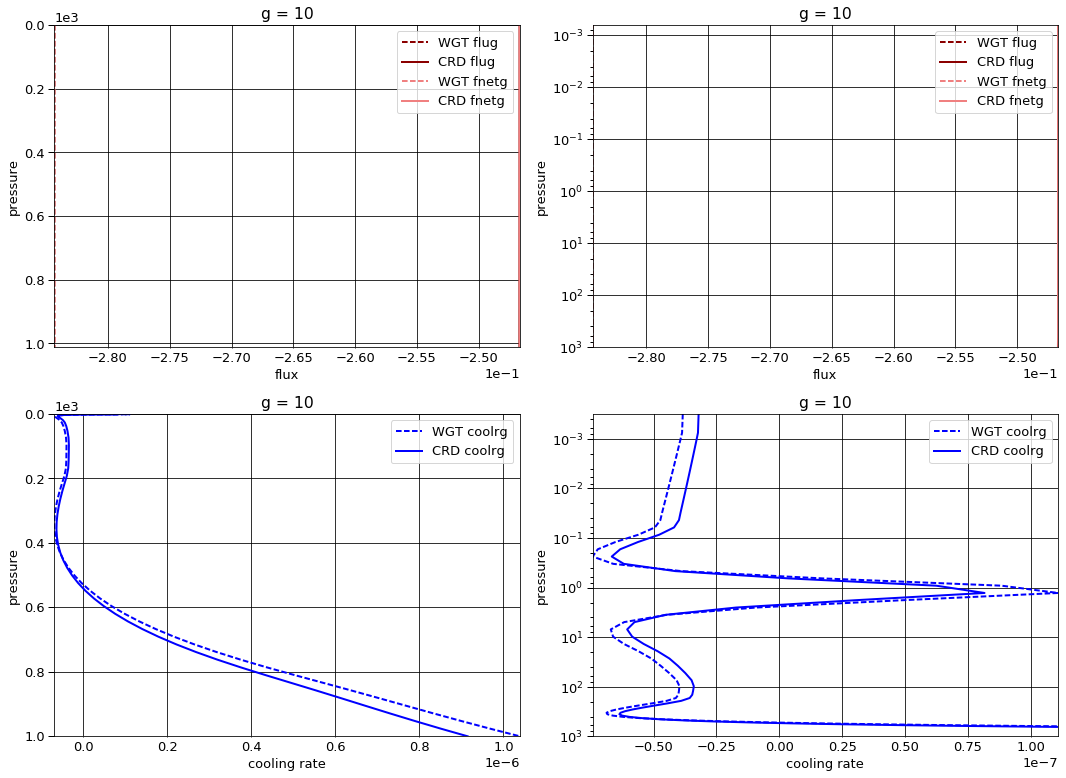

# Figure: flux, cooling rate. g-group 11

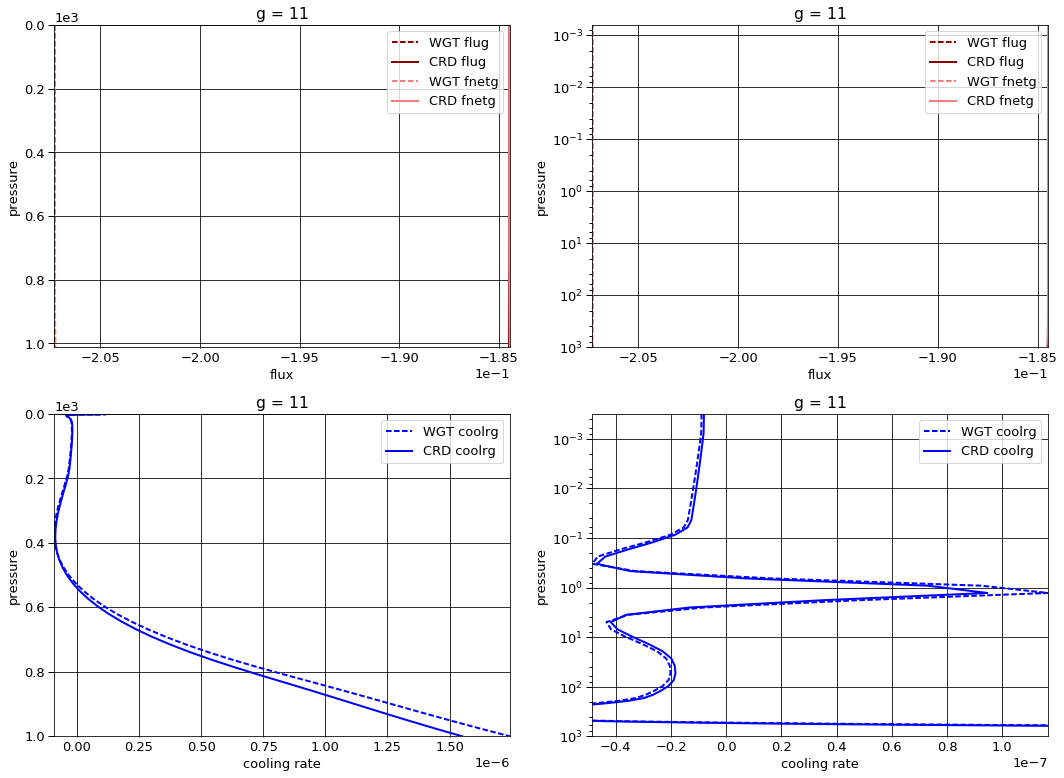

# Figure: flux, cooling rate. g-group 12

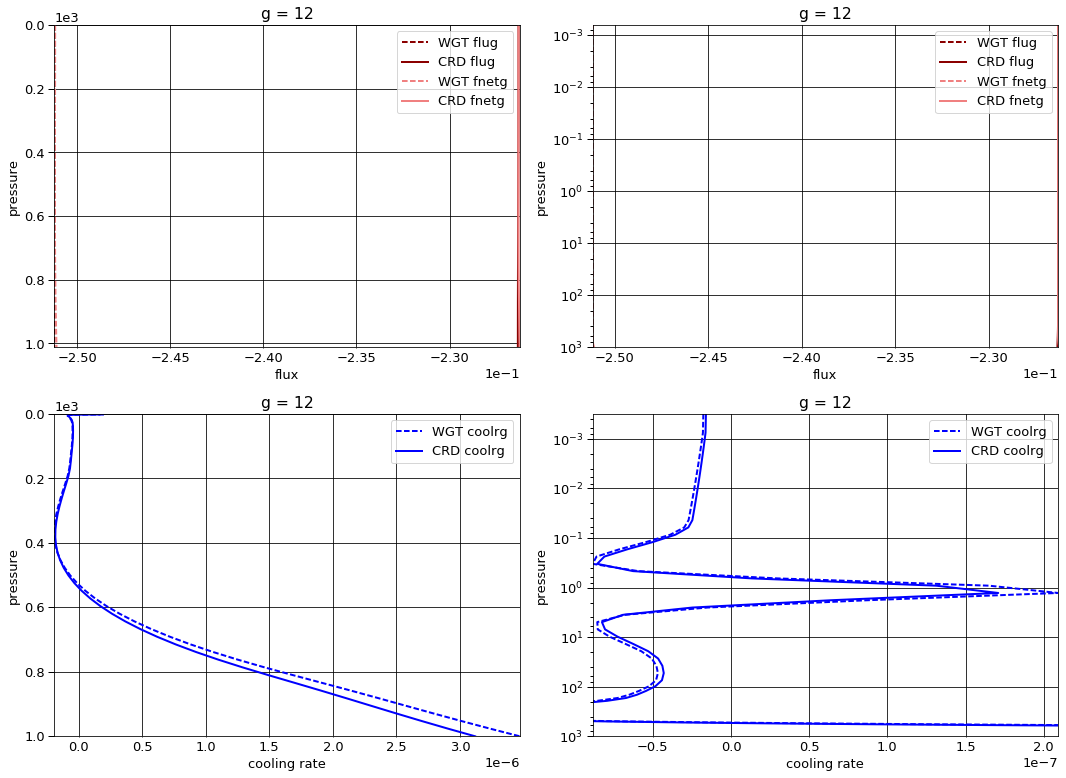

# Figure: flux, cooling rate. g-group 13

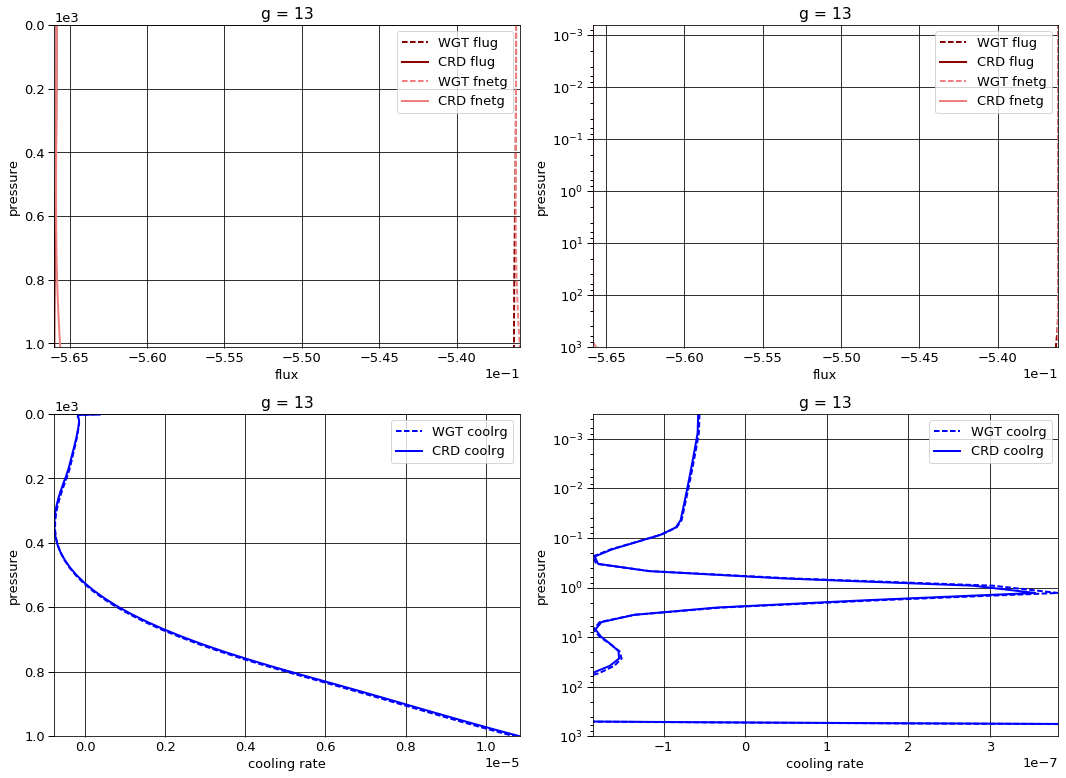

# Figure: flux, cooling rate. g-group 14

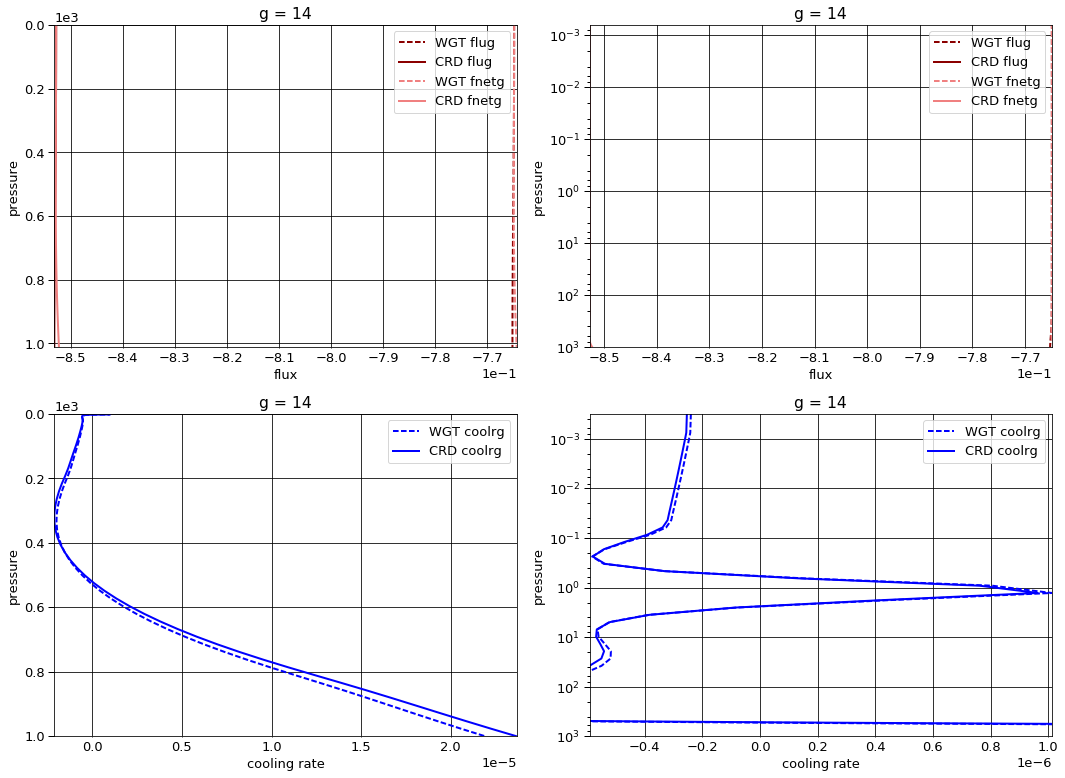

# Figure: flux, cooling rate. g-group 15

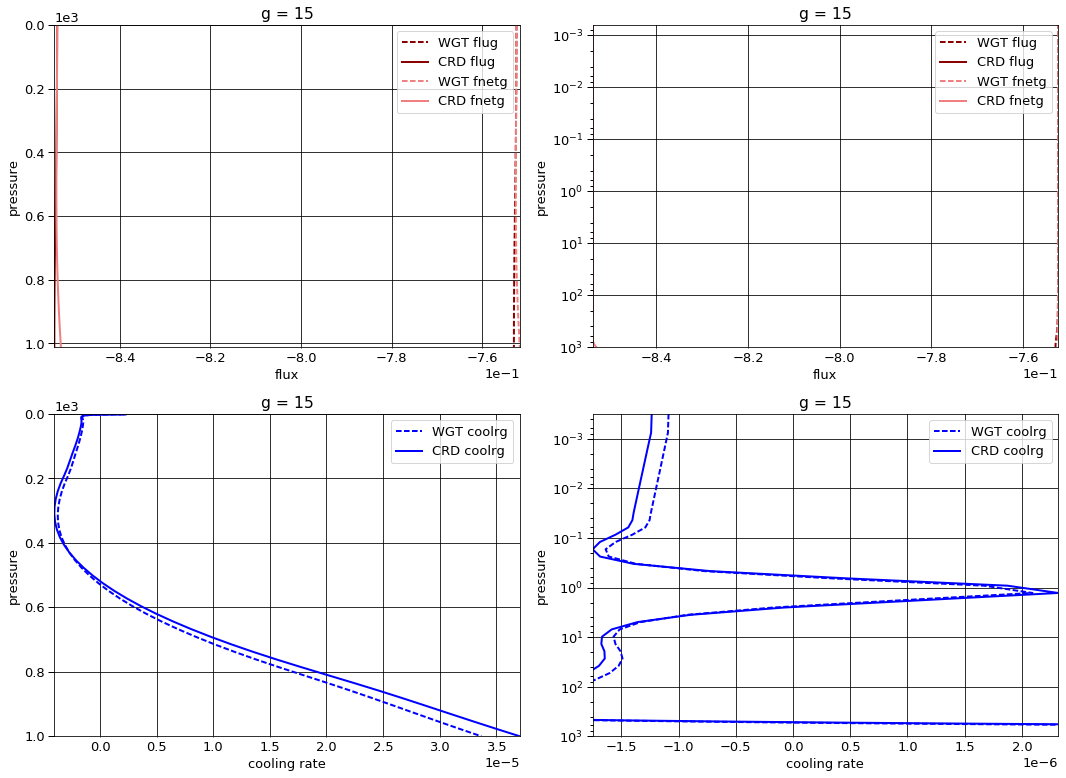

# Figure: flux, cooling rate. g-group 16

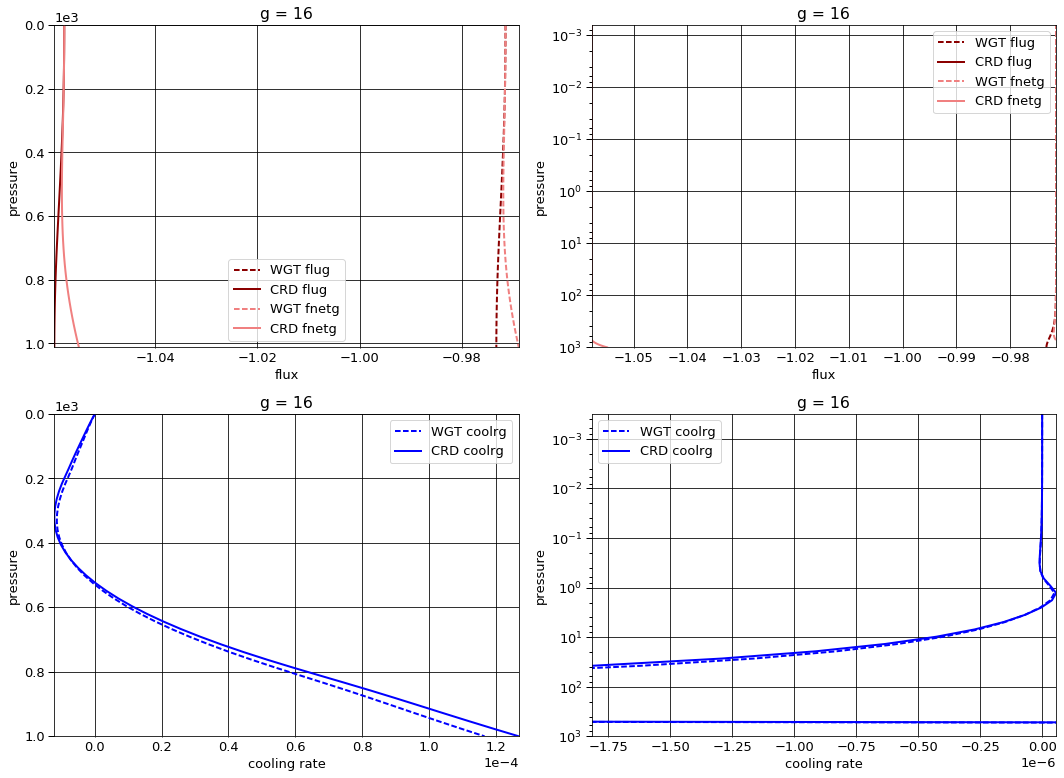

# Figure: flux, cooling rate. g-group 17

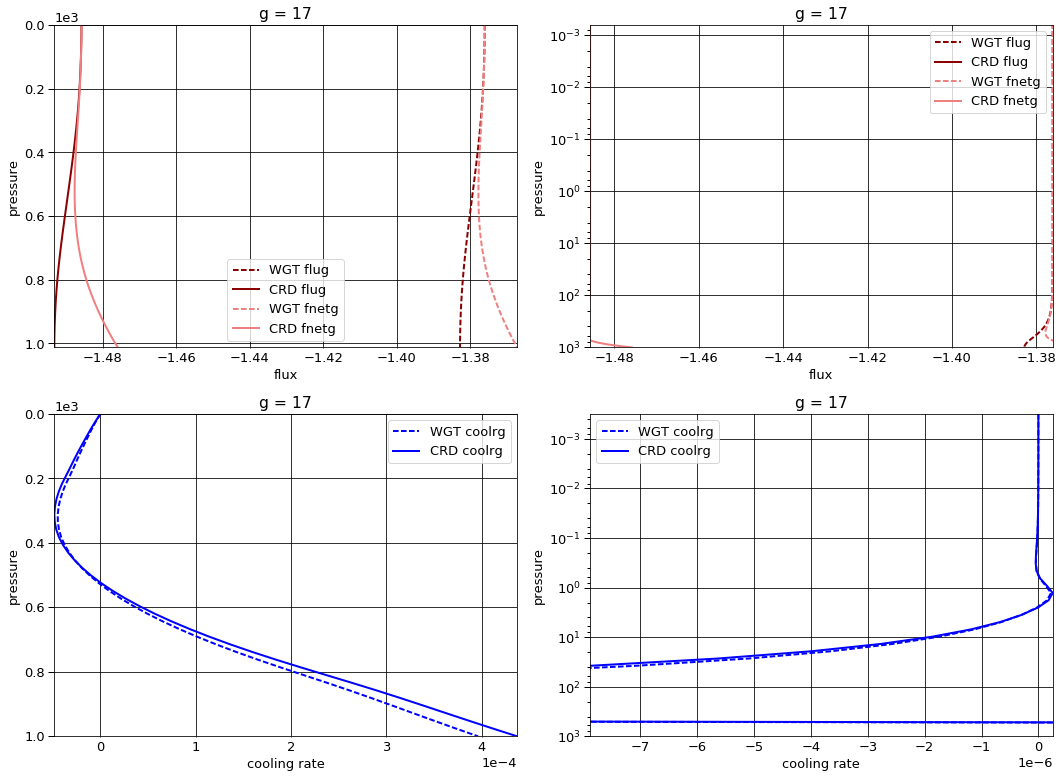

# Figure: flux, cooling rate. g-group 18

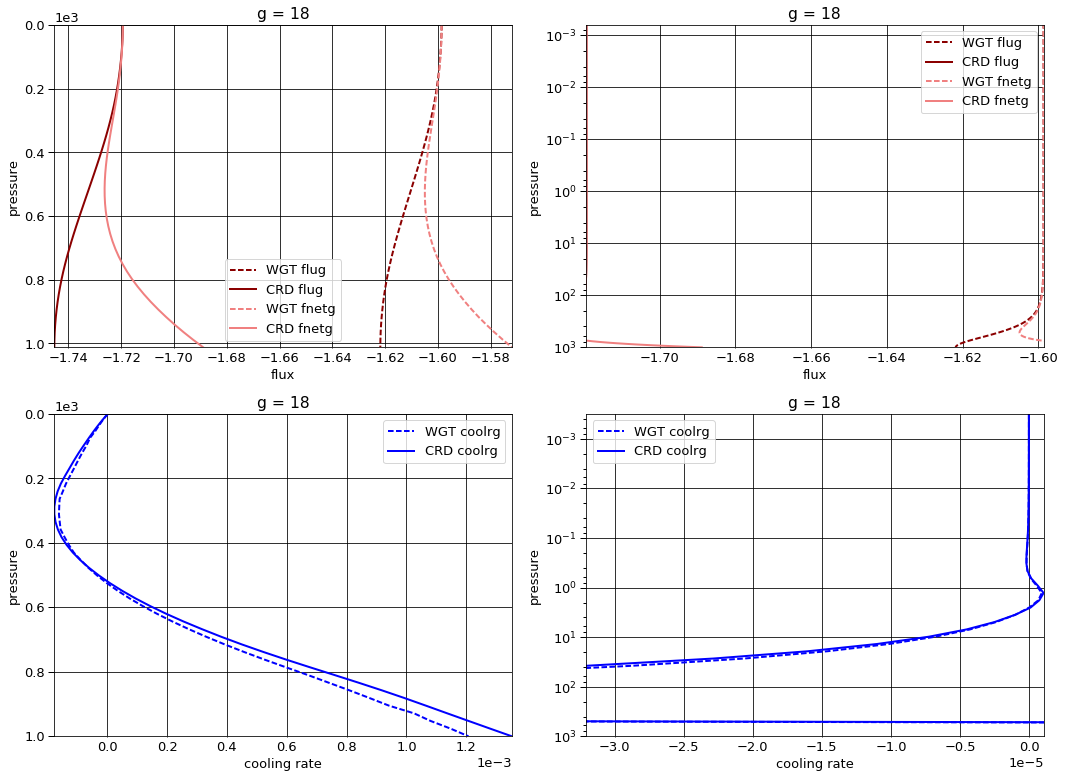

# Figure: flux, cooling rate. g-group 19

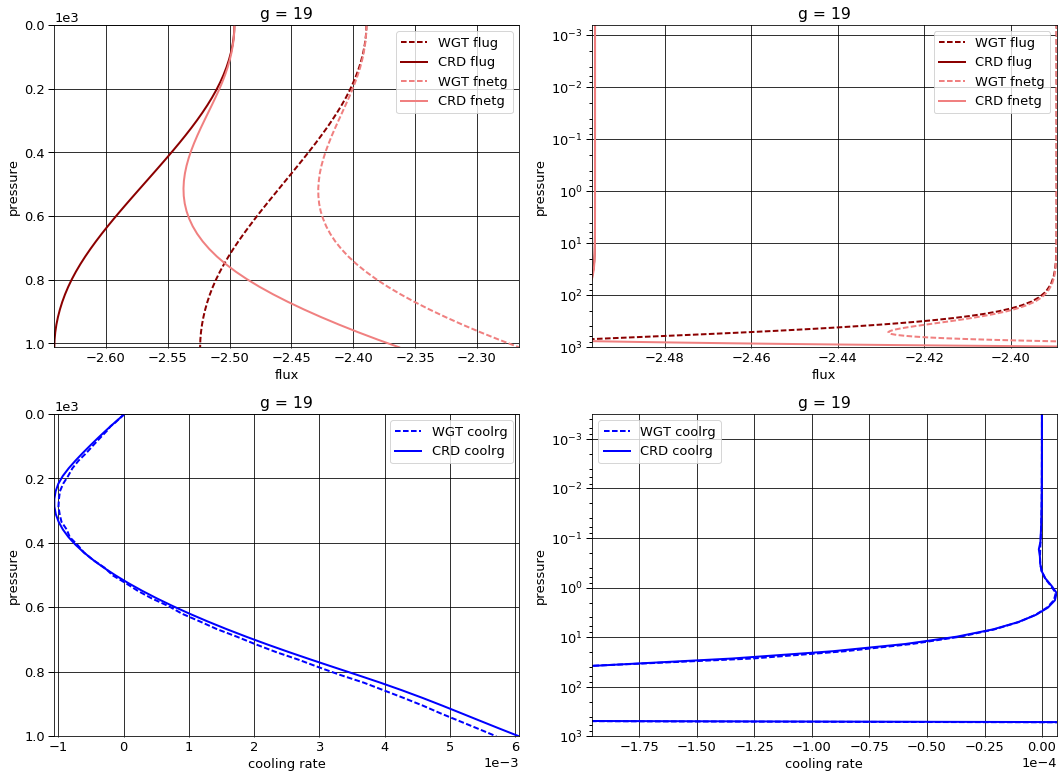

# Figure: flux, cooling rate. g-group 20

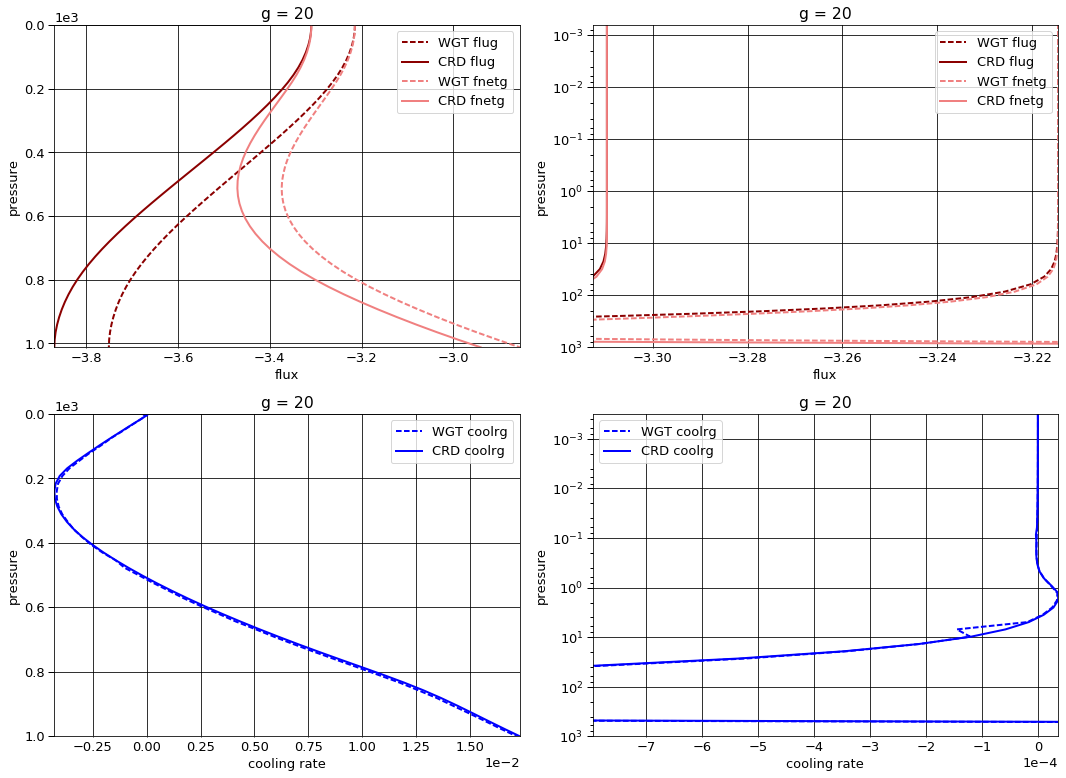

# Figure: flux, cooling rate. g-group 21

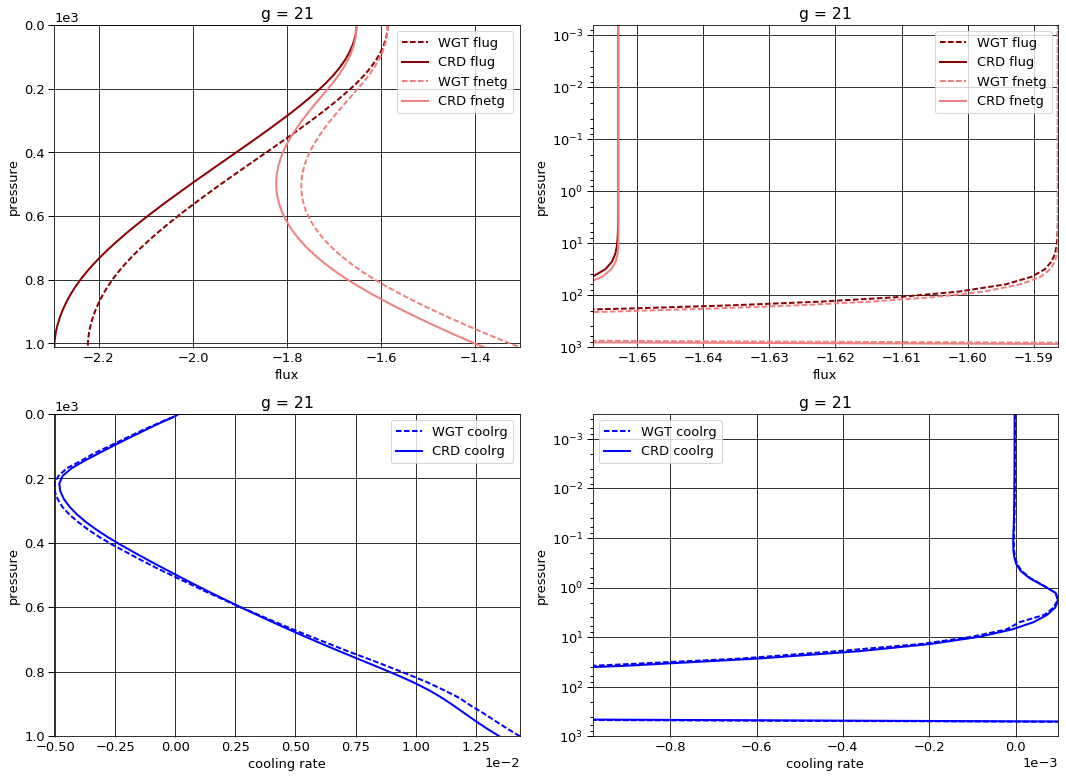

# Figure: flux, cooling rate. g-group 22

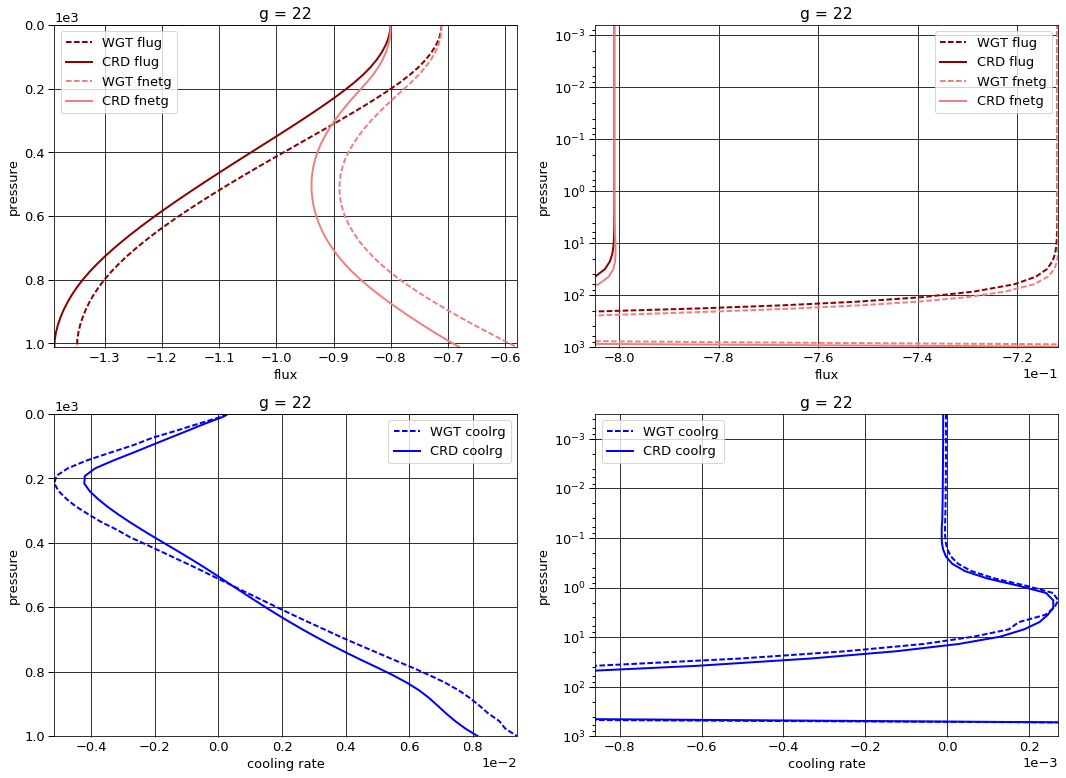

# Figure: flux, cooling rate. g-group 23

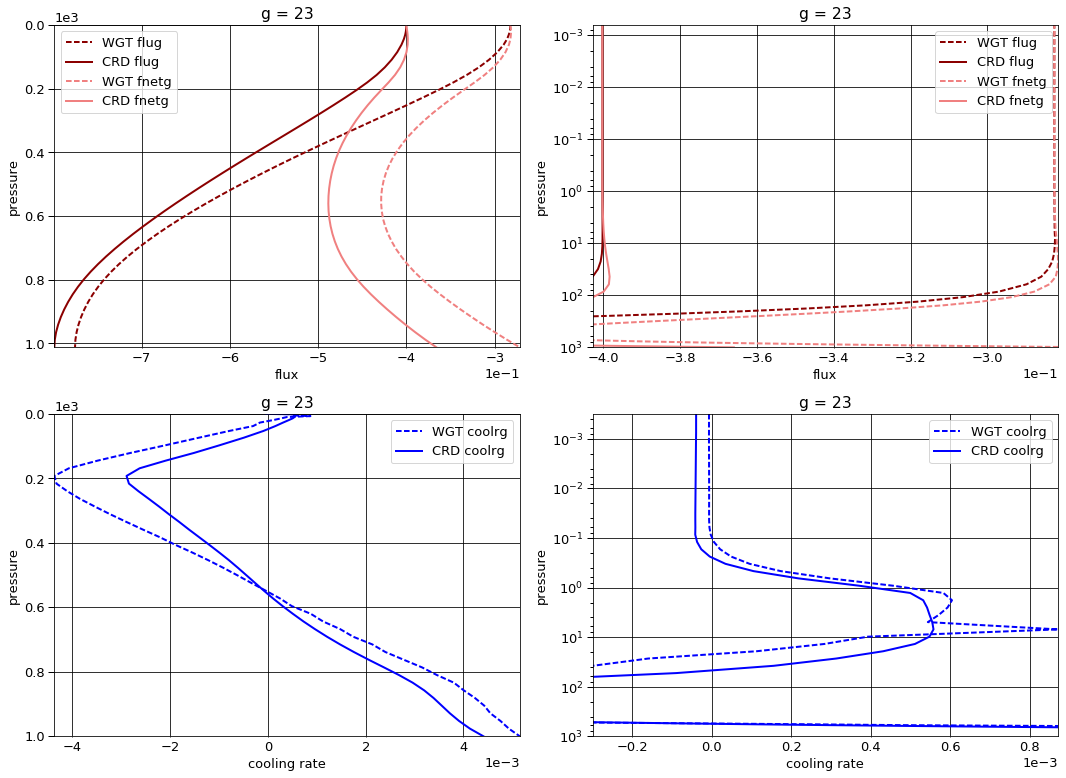

# Figure: flux, cooling rate. g-group 24

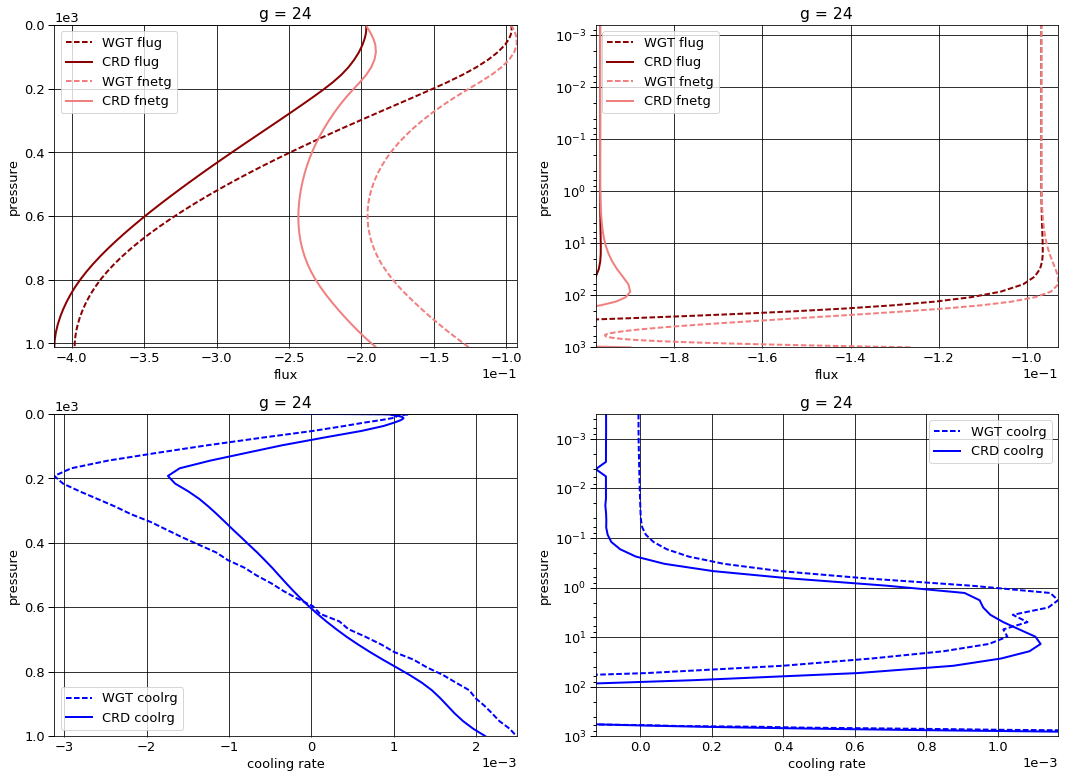

# Figure: flux, cooling rate. g-group 25

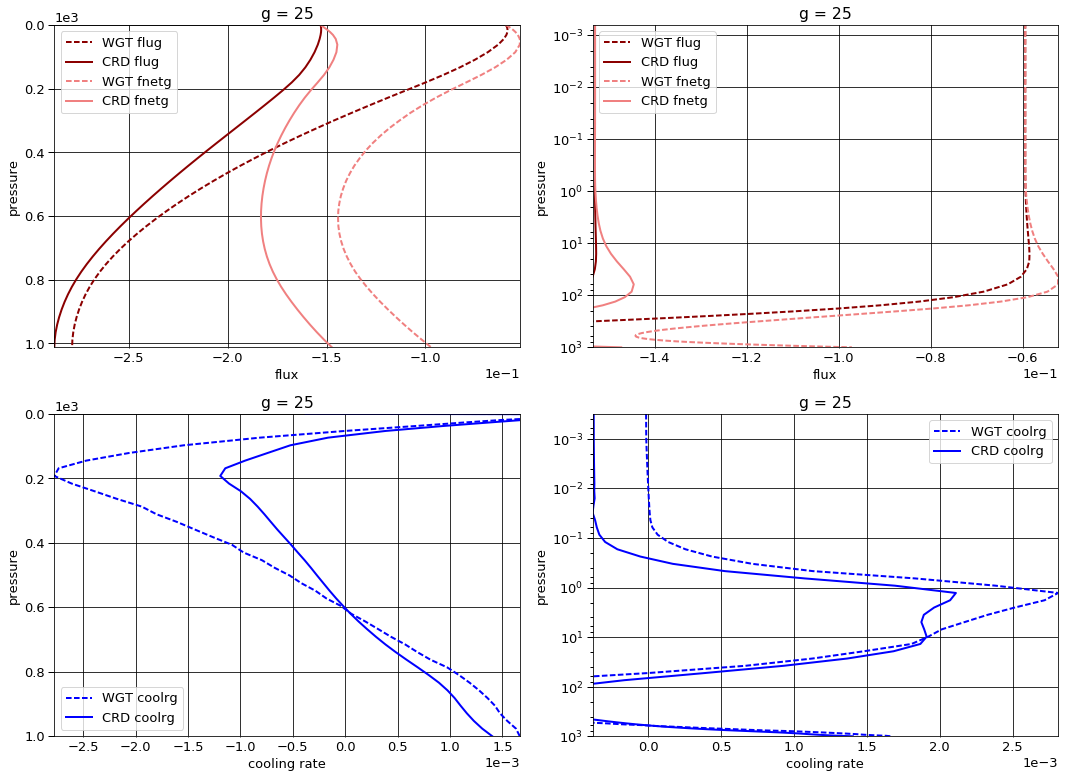

# Figure: flux, cooling rate. g-group 26

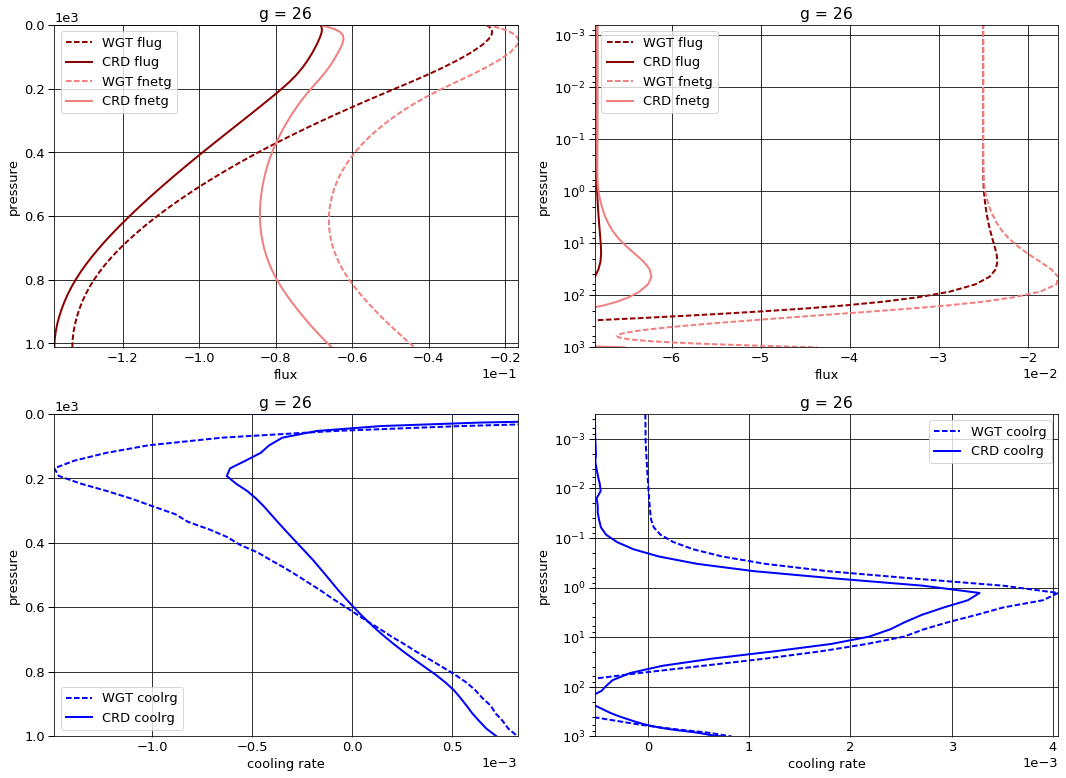

# Figure: flux, cooling rate. g-group 27

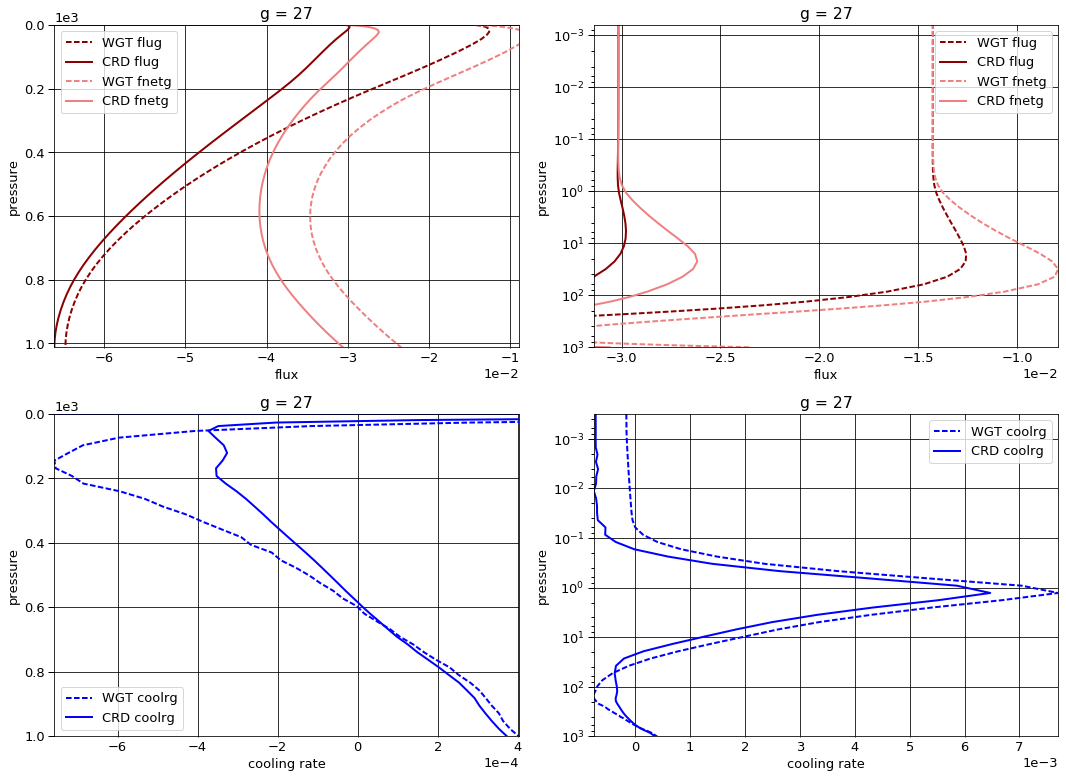

# Figure: flux, cooling rate. g-group 28

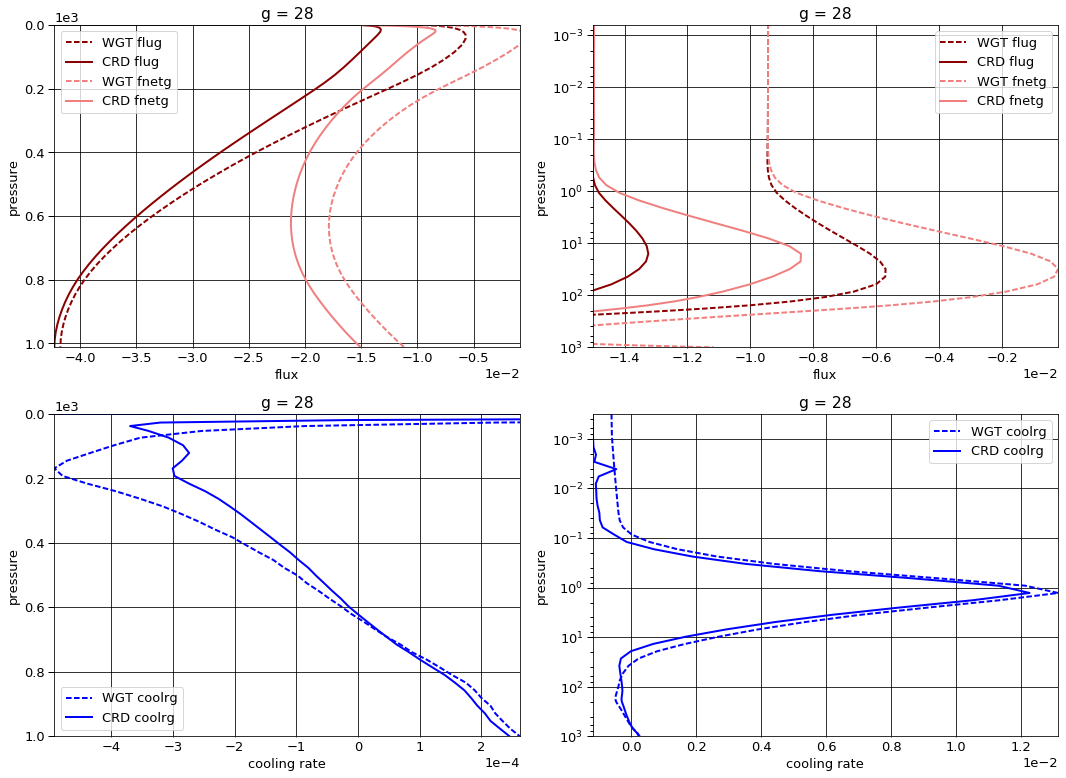

# Figure: flux, cooling rate. g-group 29

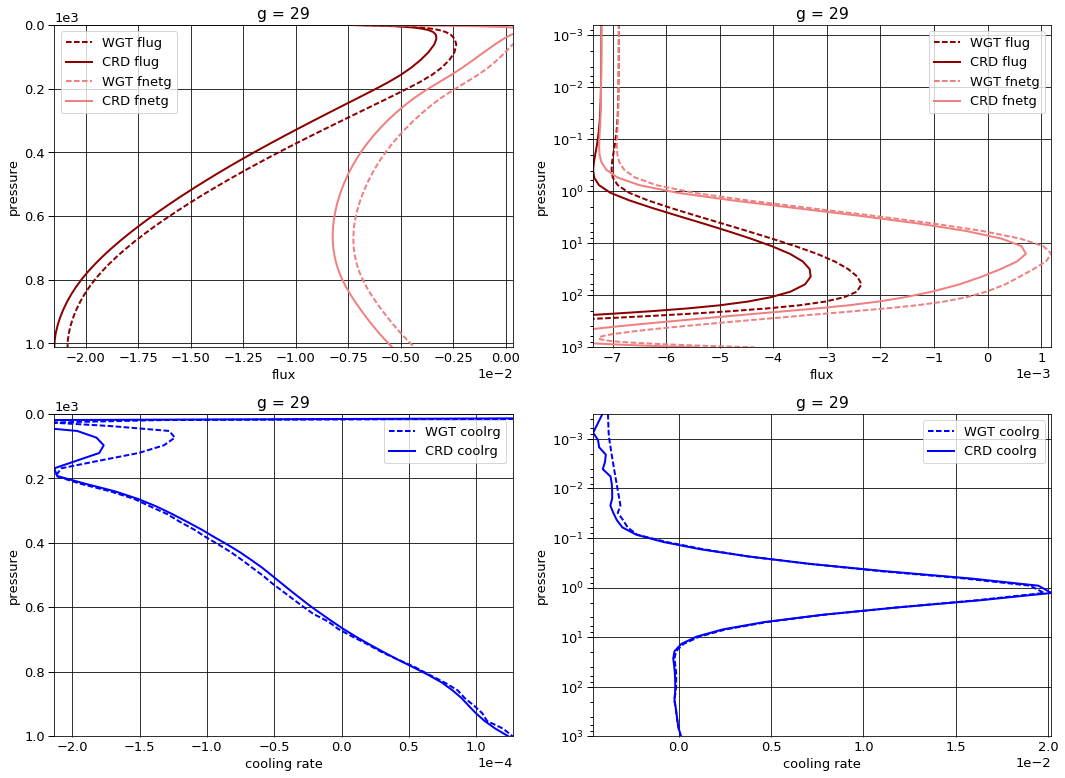

# Figure: flux, cooling rate. g-group 30

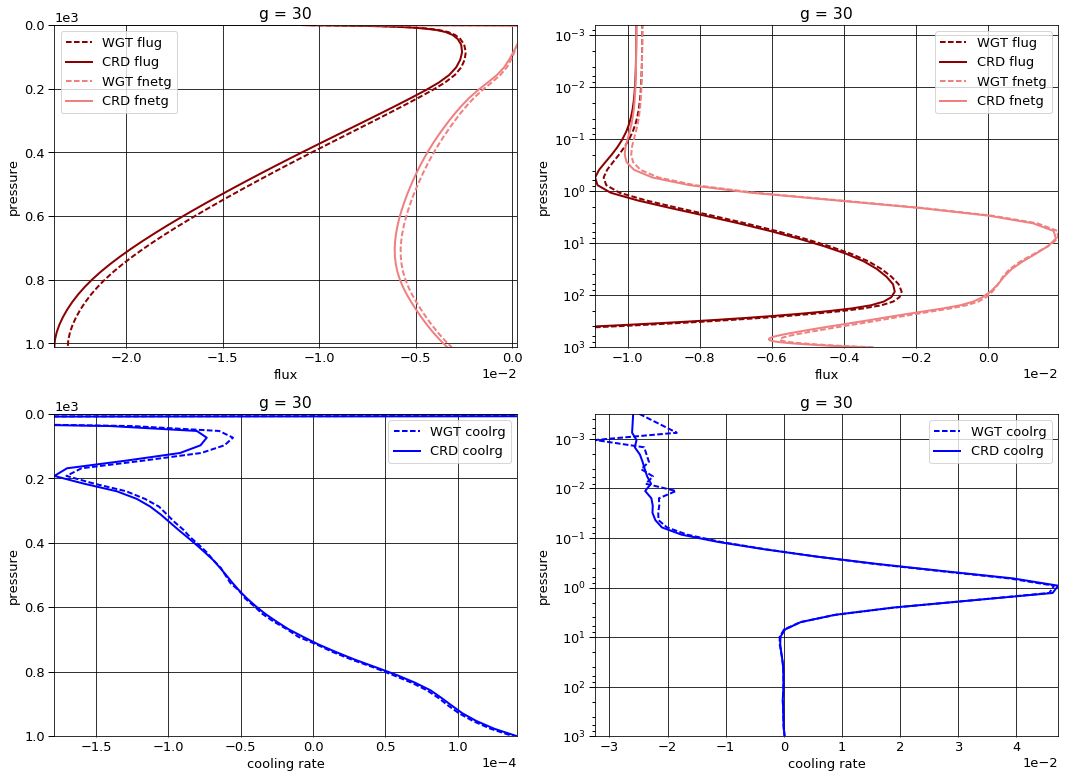

# Figure: flux, cooling rate. g-group total

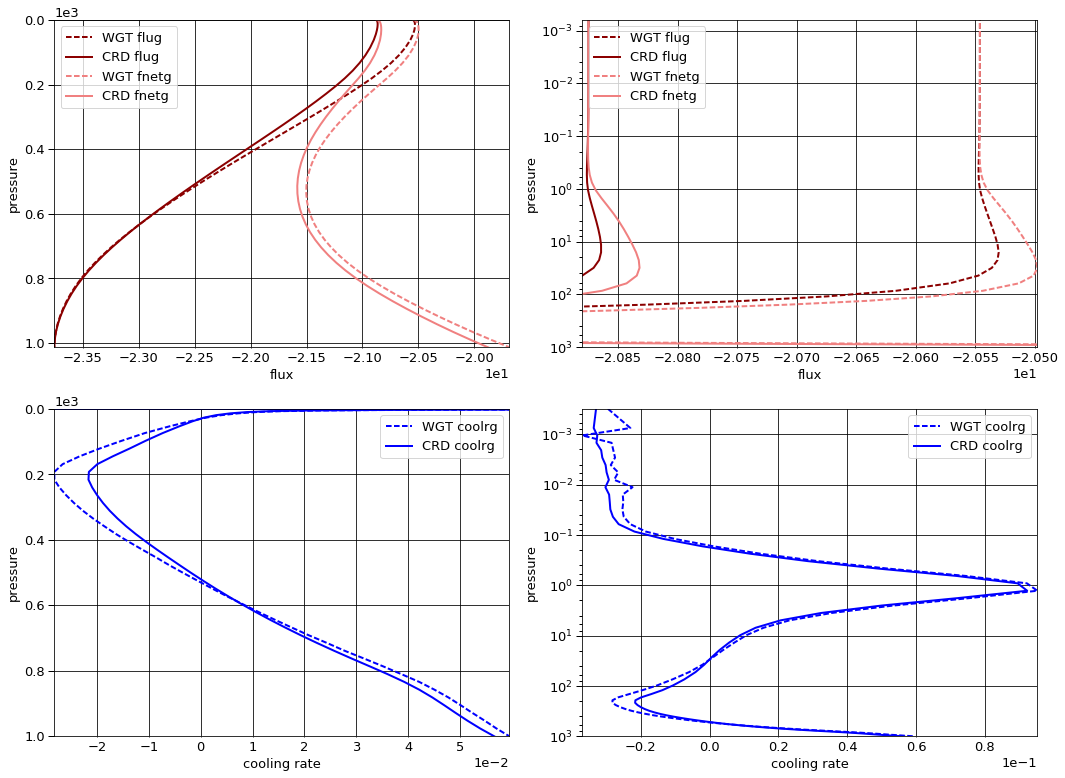

In [57]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [58]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug          fldg     fnetg
g  pressure level                                  
1  0.0      1     -0.526633  0.000000e+00 -0.526633
   1013.0   76    -0.526633  3.759776e-07 -0.526633
2  0.0      1     -0.677037  0.000000e+00 -0.677037
   1013.0   76    -0.677037  8.240331e-07 -0.677036
3  0.0      1     -0.764003  0.000000e+00 -0.764003
   1013.0   76    -0.764003  1.527220e-06 -0.764002
4  0.0      1     -0.676626  0.000000e+00 -0.676626
   1013.0   76    -0.676626  2.310066e-06 -0.676624
5  0.0      1     -0.518719  0.000000e+00 -0.518719
   1013.0   76    -0.518720  3.206039e-06 -0.518717
6  0.0      1     -0.386327  0.000000e+00 -0.386327
   1013.0   76    -0.386328  4.171340e-06 -0.386324
7  0.0      1     -0.374469  0.000000e+00 -0.374469
   1013.0   76    -0.374472  7.653142e-06 -0.374464
8  0.0      1     -0.292543  0.000000e+00 -0.292543
   1013.0   76    -0.292547  1.071354e-05 -0.292536
9  0.0      1     -0.325428  0.000000e+00 -0.325428
   1013.0   76    -0.325437  2.324005e-05 -0.325414
10 0.0      1     -0.246693  0.000000e+00 -0.246693
   1013.0   76    -0.246705  3.093190e-05 -0.246674
11 0.0      1     -0.184475  0.000000e+00 -0.184475
   1013.0   76    -0.184493  5.161269e-05 -0.184441
12 0.0      1     -0.226293  0.000000e+00 -0.226293
   1013.0   76    -0.226329  1.047255e-04 -0.226224
13 0.0      1     -0.565852  0.000000e+00 -0.565852
   1013.0   76    -0.565993  3.842353e-04 -0.565609
14 0.0      1     -0.852770  0.000000e+00 -0.852770
   1013.0   76    -0.853124  8.885567e-04 -0.852236
15 0.0      1     -0.853854  0.000000e+00 -0.853854
   1013.0   76    -0.854487  1.459877e-03 -0.853027
16 0.0      1     -1.057820  0.000000e+00 -1.057820
   1013.0   76    -1.059765  4.809649e-03 -1.054956
17 0.0      1     -1.485741  0.000000e+00 -1.485741
   1013.0   76    -1.493116  1.722345e-02 -1.475892
18 0.0      1     -1.719335  0.000000e+00 -1.719335
   1013.0   76    -1.745255  5.635261e-02 -1.688903
19 0.0      1     -2.496131  0.000000e+00 -2.496131
   1013.0   76    -2.641725  2.789166e-01 -2.362809
20 0.0      1     -3.309654  0.000000e+00 -3.309654
   1013.0   76    -3.870086  9.299320e-01 -2.940154
21 0.0      1     -1.652853  0.000000e+00 -1.652853
   1013.0   76    -2.294644  9.128883e-01 -1.381756
22 0.0      1     -0.801025  0.000000e+00 -0.801025
   1013.0   76    -1.387742  7.079391e-01 -0.679803
23 0.0      1     -0.400276  0.000000e+00 -0.400276
   1013.0   76    -0.798721  4.326822e-01 -0.366038
24 0.0      1     -0.196872  0.000000e+00 -0.196872
   1013.0   76    -0.412070  2.220986e-01 -0.189972
25 0.0      1     -0.152967  0.000000e+00 -0.152967
   1013.0   76    -0.287562  1.402824e-01 -0.147280
26 0.0      1     -0.068341  0.000000e+00 -0.068341
   1013.0   76    -0.137878  7.255354e-02 -0.065324
27 0.0      1     -0.030157  0.000000e+00 -0.030157
   1013.0   76    -0.066150  3.555703e-02 -0.030593
28 0.0      1     -0.014968  0.000000e+00 -0.014968
   1013.0   76    -0.042290  2.725236e-02 -0.015038
29 0.0      1     -0.007210  0.000000e+00 -0.007210
   1013.0   76    -0.021502  1.610069e-02 -0.005402
30 0.0      1     -0.009757  0.000000e+00 -0.009757
   1013.0   76    -0.023729  2.037803e-02 -0.003351


WGT


flug          fldg     fnetg
g  pressure level                                  
1  0.0      1     -0.624113  0.000000e+00 -0.624113
   1013.0   76    -0.624113  4.504042e-07 -0.624113
2  0.0      1     -0.806236  0.000000e+00 -0.806236
   1013.0   76    -0.806236  9.913821e-07 -0.806235
3  0.0      1     -0.921412  0.000000e+00 -0.921412
   1013.0   76    -0.921413  1.862187e-06 -0.921411
4  0.0      1     -0.811994  0.000000e+00 -0.811994
   1013.0   76    -0.811995  2.797815e-06 -0.811992
5  0.0      1     -0.616193  0.000000e+00 -0.616193
   1013.0   76    -0.616195  3.843731e-06 -0.616191
6  0.0      1     -0.457825  0.000000e+00 -0.457825
   1013.0   76    -0.457827  4.986063e-06 -0.457822
7  0.0      1     -0.439827  0.000000e+00 -0.439827
   1013.0   76    -0.439831  9.036766e-06 -0.439822
8  0.0      1     -0.342646  0.000000e+00 -0.342646
   1013.0   76    -0.342650  1.258157e-05 -0.342638
9  0.0      1     -0.377194  0.000000e+00 -0.377194
   1013.0   76    -0.377203  2.695214e-05 -0.377176
10 0.0      1     -0.284329  0.000000e+00 -0.284329
   1013.0   76    -0.284342  3.563391e-05 -0.284307
11 0.0      1     -0.207299  0.000000e+00 -0.207299
   1013.0   76    -0.207318  5.849491e-05 -0.207259
12 0.0      1     -0.251190  0.000000e+00 -0.251190
   1013.0   76    -0.251229  1.173386e-04 -0.251112
13 0.0      1     -0.536154  0.000000e+00 -0.536154
   1013.0   76    -0.536291  3.760723e-04 -0.535915
14 0.0      1     -0.764877  0.000000e+00 -0.764877
   1013.0   76    -0.765204  8.112662e-04 -0.764393
15 0.0      1     -0.752390  0.000000e+00 -0.752390
   1013.0   76    -0.752967  1.305007e-03 -0.751662
16 0.0      1     -0.971448  0.000000e+00 -0.971448
   1013.0   76    -0.973242  4.394010e-03 -0.968848
17 0.0      1     -1.376125  0.000000e+00 -1.376125
   1013.0   76    -1.382839  1.551274e-02 -1.367326
18 0.0      1     -1.598627  0.000000e+00 -1.598627
   1013.0   76    -1.621830  4.979276e-02 -1.572037
19 0.0      1     -2.389347  0.000000e+00 -2.389347
   1013.0   76    -2.523807  2.579166e-01 -2.265890
20 0.0      1     -3.214533  0.000000e+00 -3.214533
   1013.0   76    -3.751157  8.963753e-01 -2.854782
21 0.0      1     -1.586376  0.000000e+00 -1.586376
   1013.0   76    -2.223628  9.179833e-01 -1.305645
22 0.0      1     -0.712009  0.000000e+00 -0.712009
   1013.0   76    -1.348286  7.691961e-01 -0.579090
23 0.0      1     -0.282560  0.000000e+00 -0.282560
   1013.0   76    -0.775282  5.036904e-01 -0.271592
24 0.0      1     -0.096671  0.000000e+00 -0.096671
   1013.0   76    -0.398079  2.722008e-01 -0.125878
25 0.0      1     -0.059472  0.000000e+00 -0.059472
   1013.0   76    -0.278583  1.814369e-01 -0.097146
26 0.0      1     -0.025002  0.000000e+00 -0.025002
   1013.0   76    -0.133173  8.951169e-02 -0.043661
27 0.0      1     -0.014257  0.000000e+00 -0.014257
   1013.0   76    -0.064787  4.135981e-02 -0.023427
28 0.0      1     -0.009441  0.000000e+00 -0.009441
   1013.0   76    -0.041752  3.058875e-02 -0.011163
29 0.0      1     -0.006882  0.000000e+00 -0.006882
   1013.0   76    -0.020876  1.652597e-02 -0.004350
30 0.0      1     -0.009592  0.000000e+00 -0.009592
   1013.0   76    -0.023035  1.990876e-02 -0.003127


WGT - CRD


flug          fldg     fnetg
g  pressure level                                  
1  0.0      1     -0.097480  0.000000e+00 -0.097480
   1013.0   76    -0.097480  7.442660e-08 -0.097480
2  0.0      1     -0.129199  0.000000e+00 -0.129199
   1013.0   76    -0.129199  1.673490e-07 -0.129199
3  0.0      1     -0.157409  0.000000e+00 -0.157409
   1013.0   76    -0.157410  3.349669e-07 -0.157409
4  0.0      1     -0.135369  0.000000e+00 -0.135369
   1013.0   76    -0.135369  4.877488e-07 -0.135368
5  0.0      1     -0.097474  0.000000e+00 -0.097474
   1013.0   76    -0.097475  6.376924e-07 -0.097474
6  0.0      1     -0.071499  0.000000e+00 -0.071499
   1013.0   76    -0.071499  8.147223e-07 -0.071498
7  0.0      1     -0.065358  0.000000e+00 -0.065358
   1013.0   76    -0.065358  1.383624e-06 -0.065357
8  0.0      1     -0.050103  0.000000e+00 -0.050103
   1013.0   76    -0.050104  1.868022e-06 -0.050102
9  0.0      1     -0.051766  0.000000e+00 -0.051766
   1013.0   76    -0.051767  3.712092e-06 -0.051763
10 0.0      1     -0.037636  0.000000e+00 -0.037636
   1013.0   76    -0.037637  4.702009e-06 -0.037633
11 0.0      1     -0.022824  0.000000e+00 -0.022824
   1013.0   76    -0.022825  6.882219e-06 -0.022818
12 0.0      1     -0.024897  0.000000e+00 -0.024897
   1013.0   76    -0.024900  1.261313e-05 -0.024887
13 0.0      1      0.029698  0.000000e+00  0.029698
   1013.0   76     0.029702 -8.162970e-06  0.029694
14 0.0      1      0.087894  0.000000e+00  0.087894
   1013.0   76     0.087920 -7.729049e-05  0.087842
15 0.0      1      0.101463  0.000000e+00  0.101463
   1013.0   76     0.101520 -1.548703e-04  0.101365
16 0.0      1      0.086372  0.000000e+00  0.086372
   1013.0   76     0.086523 -4.156385e-04  0.086108
17 0.0      1      0.109616  0.000000e+00  0.109616
   1013.0   76     0.110277 -1.710705e-03  0.108566
18 0.0      1      0.120708  0.000000e+00  0.120708
   1013.0   76     0.123425 -6.559857e-03  0.116865
19 0.0      1      0.106783  0.000000e+00  0.106783
   1013.0   76     0.117918 -2.099998e-02  0.096918
20 0.0      1      0.095121  0.000000e+00  0.095121
   1013.0   76     0.118928 -3.355670e-02  0.085372
21 0.0      1      0.066478  0.000000e+00  0.066478
   1013.0   76     0.071016  5.095030e-03  0.076111
22 0.0      1      0.089016  0.000000e+00  0.089016
   1013.0   76     0.039456  6.125704e-02  0.100713
23 0.0      1      0.117715  0.000000e+00  0.117715
   1013.0   76     0.023438  7.100817e-02  0.094446
24 0.0      1      0.100201  0.000000e+00  0.100201
   1013.0   76     0.013991  5.010220e-02  0.064094
25 0.0      1      0.093495  0.000000e+00  0.093495
   1013.0   76     0.008979  4.115449e-02  0.050134
26 0.0      1      0.043340  0.000000e+00  0.043340
   1013.0   76     0.004705  1.695815e-02  0.021663
27 0.0      1      0.015900  0.000000e+00  0.015900
   1013.0   76     0.001363  5.802784e-03  0.007166
28 0.0      1      0.005527  0.000000e+00  0.005527
   1013.0   76     0.000539  3.336388e-03  0.003875
29 0.0      1      0.000327  0.000000e+00  0.000327
   1013.0   76     0.000627  4.252850e-04  0.001052
30 0.0      1      0.000165  0.000000e+00  0.000165
   1013.0   76     0.000694 -4.692760e-04  0.000225

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1      0.000000e+00
   1001.112500 75     1.230647e-08
2  0.000312    1      0.000000e+00
   1001.112500 75     2.641326e-08
3  0.000312    1      0.000000e+00
   1001.112500 75     4.758304e-08
4  0.000312    1      0.000000e+00
   1001.112500 75     7.103972e-08
5  0.000312    1      0.000000e+00
   1001.112500 75     9.681088e-08
6  0.000312    1     -6.349310e-10
   1001.112500 75     1.220540e-07
7  0.000312    1     -8.600839e-10
   1001.112500 75     2.261433e-07
8  0.000312    1     -3.725529e-09
   1001.112500 75     3.117162e-07
9  0.000312    1     -1.061070e-08
   1001.112500 75     6.823454e-07
10 0.000312    1     -3.207603e-08
   1001.112500 75     9.148785e-07
11 0.000312    1     -8.046587e-09
   1001.112500 75     1.550657e-06
12 0.000312    1     -1.599786e-08
   1001.112500 75     3.118412e-06
13 0.000312    1     -5.775771e-08
   1001.112500 75     1.085279e-05
14 0.000312    1     -2.534921e-07
   1001.112500 75     2.367691e-05
15 0.000312    1     -1.234384e-06
   1001.112500 75     3.709766e-05
16 0.000312    1     -1.501019e-11
   1001.112500 75     1.267610e-04
17 0.000312    1     -3.302242e-10
   1001.112500 75     4.368369e-04
18 0.000312    1     -4.896324e-09
   1001.112500 75     1.352242e-03
19 0.000312    1     -6.653717e-08
   1001.112500 75     6.057849e-03
20 0.000312    1     -5.656560e-07
   1001.112500 75     1.733586e-02
21 0.000312    1     -2.308747e-06
   1001.112500 75     1.349095e-02
22 0.000312    1     -9.879219e-06
   1001.112500 75     8.161990e-03
23 0.000312    1     -3.866013e-05
   1001.112500 75     4.407671e-03
24 0.000312    1     -9.599706e-05
   1001.112500 75     2.115062e-03
25 0.000312    1     -3.737505e-04
   1001.112500 75     1.404231e-03
26 0.000312    1     -5.228561e-04
   1001.112500 75     7.198201e-04
27 0.000312    1     -7.192866e-04
   1001.112500 75     3.731081e-04
28 0.000312    1     -1.190871e-03
   1001.112500 75     2.458315e-04
29 0.000312    1     -4.111626e-03
   1001.112500 75     1.238616e-04
30 0.000312    1     -2.591155e-02
   1001.112500 75     1.412381e-04


WGT


coolrg
g  pressure    layer              
1  0.000312    1      0.000000e+00
   1001.112500 75     1.458892e-08
2  0.000312    1      0.000000e+00
   1001.112500 75     3.142014e-08
3  0.000312    1      0.000000e+00
   1001.112500 75     5.728466e-08
4  0.000312    1      0.000000e+00
   1001.112500 75     8.495943e-08
5  0.000312    1      0.000000e+00
   1001.112500 75     1.146301e-07
6  0.000312    1     -7.212396e-10
   1001.112500 75     1.439608e-07
7  0.000312    1     -9.854189e-10
   1001.112500 75     2.633839e-07
8  0.000312    1     -4.316931e-09
   1001.112500 75     3.606335e-07
9  0.000312    1     -1.242994e-08
   1001.112500 75     7.803272e-07
10 0.000312    1     -3.837280e-08
   1001.112500 75     1.039050e-06
11 0.000312    1     -8.901793e-09
   1001.112500 75     1.743117e-06
12 0.000312    1     -1.765123e-08
   1001.112500 75     3.469657e-06
13 0.000312    1     -5.616813e-08
   1001.112500 75     1.071738e-05
14 0.000312    1     -2.396752e-07
   1001.112500 75     2.192382e-05
15 0.000312    1     -1.087421e-06
   1001.112500 75     3.370161e-05
16 0.000312    1     -1.801223e-11
   1001.112500 75     1.165327e-04
17 0.000312    1     -2.281549e-10
   1001.112500 75     3.959143e-04
18 0.000312    1     -3.074087e-09
   1001.112500 75     1.207363e-03
19 0.000312    1     -3.955485e-08
   1001.112500 75     5.709454e-03
20 0.000312    1     -3.157363e-07
   1001.112500 75     1.718908e-02
21 0.000312    1     -1.065330e-06
   1001.112500 75     1.433712e-02
22 0.000312    1     -3.025527e-06
   1001.112500 75     9.399768e-03
23 0.000312    1     -6.303343e-06
   1001.112500 75     5.151003e-03
24 0.000312    1     -5.341096e-06
   1001.112500 75     2.494093e-03
25 0.000312    1     -1.439034e-05
   1001.112500 75     1.666316e-03
26 0.000312    1     -2.491402e-05
   1001.112500 75     8.250948e-04
27 0.000312    1     -1.601778e-04
   1001.112500 75     4.024971e-04
28 0.000312    1     -6.094738e-04
   1001.112500 75     2.625285e-04
29 0.000312    1     -3.814506e-03
   1001.112500 75     1.270042e-04
30 0.000312    1     -2.486791e-02
   1001.112500 75     1.385740e-04


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1      0.000000e+00
   1001.112500 75     2.282448e-09
2  0.000312    1      0.000000e+00
   1001.112500 75     5.006884e-09
3  0.000312    1      0.000000e+00
   1001.112500 75     9.701622e-09
4  0.000312    1      0.000000e+00
   1001.112500 75     1.391971e-08
5  0.000312    1      0.000000e+00
   1001.112500 75     1.781922e-08
6  0.000312    1     -8.630859e-11
   1001.112500 75     2.190677e-08
7  0.000312    1     -1.253351e-10
   1001.112500 75     3.724064e-08
8  0.000312    1     -5.914014e-10
   1001.112500 75     4.891722e-08
9  0.000312    1     -1.819235e-09
   1001.112500 75     9.798182e-08
10 0.000312    1     -6.296774e-09
   1001.112500 75     1.241719e-07
11 0.000312    1     -8.552055e-10
   1001.112500 75     1.924602e-07
12 0.000312    1     -1.653372e-09
   1001.112500 75     3.512455e-07
13 0.000312    1      1.589580e-09
   1001.112500 75    -1.354120e-07
14 0.000312    1      1.381688e-08
   1001.112500 75    -1.753089e-06
15 0.000312    1      1.469633e-07
   1001.112500 75    -3.396058e-06
16 0.000312    1     -3.002038e-12
   1001.112500 75    -1.022828e-05
17 0.000312    1      1.020693e-10
   1001.112500 75    -4.092260e-05
18 0.000312    1      1.822237e-09
   1001.112500 75    -1.448795e-04
19 0.000312    1      2.698232e-08
   1001.112500 75    -3.483953e-04
20 0.000312    1      2.499196e-07
   1001.112500 75    -1.467740e-04
21 0.000312    1      1.243417e-06
   1001.112500 75     8.461680e-04
22 0.000312    1      6.853692e-06
   1001.112500 75     1.237778e-03
23 0.000312    1      3.235678e-05
   1001.112500 75     7.433319e-04
24 0.000312    1      9.065596e-05
   1001.112500 75     3.790311e-04
25 0.000312    1      3.593602e-04
   1001.112500 75     2.620856e-04
26 0.000312    1      4.979421e-04
   1001.112500 75     1.052748e-04
27 0.000312    1      5.591088e-04
   1001.112500 75     2.938898e-05
28 0.000312    1      5.813969e-04
   1001.112500 75     1.669691e-05
29 0.000312    1      2.971201e-04
   1001.112500 75     3.142530e-06
30 0.000312    1      1.043640e-03
   1001.112500 75    -2.664090e-06

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-20.874828,0.00000,-20.874828
1013.0,76,-23.755171,3.87794,-19.877230



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-20.546022,0.000000,-20.546022
1013.0,76,-23.755171,4.069161,-19.686009



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,3.288061e-01,0.000000,0.328806
1013.0,76,7.800000e-08,0.191221,0.191221


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.032979
1001.112500,75,0.056572



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.029509
1001.112500,75,0.059497



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.003470
1001.112500,75,0.002925


In [59]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.026273,0.020898
2,0.033939,0.026827
3,0.038788,0.030154
4,0.034182,0.026749
5,0.025939,0.020574
6,0.019273,0.015334
7,0.018515,0.014907
8,0.014424,0.011656
9,0.015879,0.013010


In [62]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,3.951048e-26
2,7.211353e-26
3,1.316198e-25
4,2.402292e-25
5,4.384603e-25
6,8.002668e-25
7,1.460627e-24
8,2.665900e-24
9,4.865734e-24


In [63]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')